In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
def insertBreak():
    print("-"*75)
    

In [3]:
allDataDF = pd.read_csv("data.csv", header = None)
allDataDF = allDataDF.drop(columns = [12])
allDataDF.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,30.0,134.0,74.0,33.0,28.0,34.0,28.0,105.0,46.0,10.998667,-1.0,0.0
1,29.0,133.0,73.0,33.0,27.0,34.0,28.0,103.0,46.0,10.998667,-1.0,0.0
2,29.0,133.0,71.0,33.0,27.0,36.0,28.0,102.0,45.0,10.998667,-1.0,0.0
3,30.0,132.0,70.0,34.0,27.0,36.0,28.0,100.0,45.0,10.998667,-1.0,0.0
4,31.0,130.0,69.0,33.0,27.0,36.0,28.0,99.0,45.0,10.998667,-1.0,0.0


In [4]:
xDF = allDataDF.drop(columns = [11])
yDF = allDataDF.drop(columns = range(11))

print("xDF: "+str(xDF.shape)+"\nyDF: "+str(yDF.shape))
insertBreak()


xDF: (4586, 11)
yDF: (4586, 1)
---------------------------------------------------------------------------


Input Features:

Feature-1:


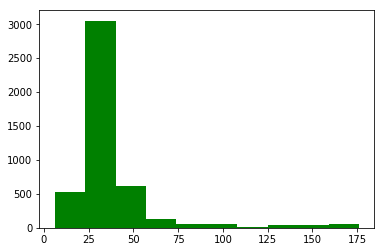

Feature-2:


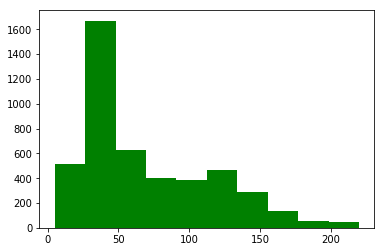

Feature-3:


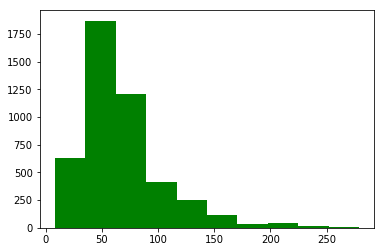

Feature-4:


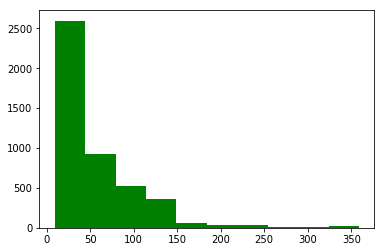

Feature-5:


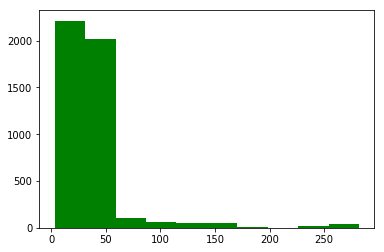

Feature-6:


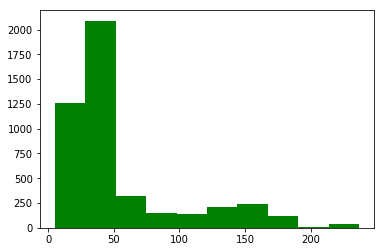

Feature-7:


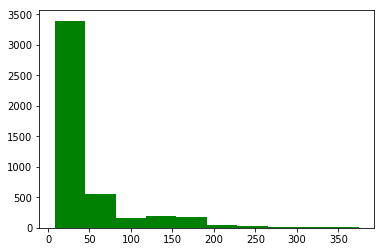

Feature-8:


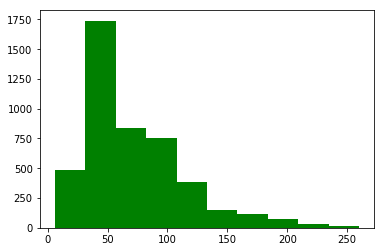

Feature-9:


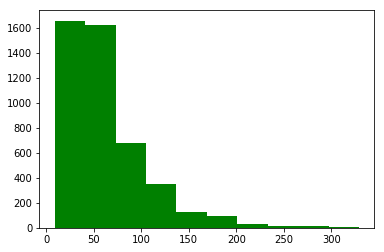

Feature-10:


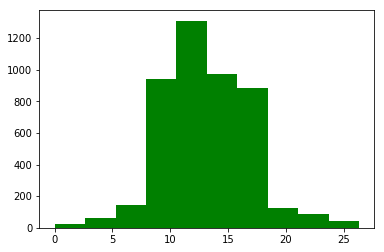

Feature-11:


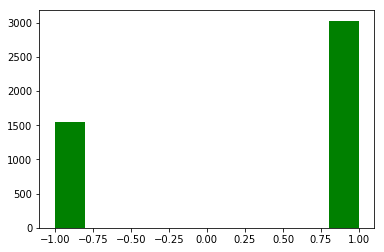

---------------------------------------------------------------------------


In [5]:
print("Input Features:\n")
for i in range(xDF.shape[1]):
    print("Feature-"+str(i+1)+":")
    x = plt.hist(xDF[i], color=['green'])
    plt.show()

insertBreak()


In [6]:
#Comment on features: Alot of features seem to be distributed logarithmicly


In [7]:
toTrain = 1.0

trainCount = int(toTrain * xDF.shape[0])
xTrain = xDF.loc[:trainCount]
xTest = xDF.loc[trainCount:]
yTrain = yDF.loc[:trainCount]
yTest = yDF.loc[trainCount:]


In [8]:
print("xTrain: "+str(xTrain.shape)+" | yTrain: "+str(xTest.shape))
print("yTrain: "+str(yTrain.shape)+" | yTest: "+str(yTest.shape))

insertBreak()


xTrain: (4586, 11) | yTrain: (0, 11)
yTrain: (4586, 1) | yTest: (0, 1)
---------------------------------------------------------------------------


In [9]:
def multilayerPerceptron(x, weights, biases, keep_prob):
    layer1 = tf.add( tf.matmul(x, weights['h1']), biases['b1'] )
    layer1 = tf.nn.relu(layer1)
    layer1 = tf.nn.dropout(layer1, keep_prob)
    
    outLayer = tf.matmul(layer1, weights['out']) + biases['out']
    
    return outLayer




In [10]:
nH1 = 30
nInput = xTrain.shape[1]
nOutput = 1

weights = {
    'h1':tf.Variable(tf.random_normal([nInput, nH1])),
    'out':tf.Variable(tf.random_normal([nH1, nOutput]))   
}
biases = {
    'b1':tf.Variable(tf.random_normal([nH1])),
    'out':tf.Variable(tf.random_normal([nOutput]))
}

alpha = 0.001
keep_prob = tf.placeholder("float")
epochs = 5000*15
displayStep = 1000

x = tf.placeholder("float", [None, nInput])
y = tf.placeholder("float", [None, nOutput])



Instructions for updating:
Colocations handled automatically by placer.


In [11]:
predictions = multilayerPerceptron(x, weights, biases, keep_prob)

cost = tf.reduce_mean( tf.square(y - predictions) )
optimizer = tf.train.AdamOptimizer(alpha).minimize(cost)

saver = tf.train.Saver()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
costVals = []


In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    xBatch = np.array_split(xTrain, 1)
    yBatch = np.array_split(yTrain, 1)
    
    for epoch in range(epochs):
        
        feed_dict = {x: xBatch[0], y: yBatch[0], keep_prob: 1.0}
        _, c = sess.run([optimizer, cost], feed_dict)
        
        costVals += [c]
        if epoch % displayStep == 0:
            print("Epoch: "+str(epoch)+", Cost: "+str(c))
    
    save_path = saver.save(sess, "aBPedalModel5/model.ckpt")

print("Optimization Finished & model saved!")


Epoch: 0, Cost: 123141.09
Epoch: 1000, Cost: 610.0169
Epoch: 2000, Cost: 151.69344
Epoch: 3000, Cost: 97.41378
Epoch: 4000, Cost: 67.79855
Epoch: 5000, Cost: 47.252434
Epoch: 6000, Cost: 32.602615
Epoch: 7000, Cost: 23.004663
Epoch: 8000, Cost: 16.326406
Epoch: 9000, Cost: 11.429812
Epoch: 10000, Cost: 8.036382
Epoch: 11000, Cost: 5.787465
Epoch: 12000, Cost: 4.362063
Epoch: 13000, Cost: 3.3258946
Epoch: 14000, Cost: 2.921655
Epoch: 15000, Cost: 2.2142763
Epoch: 16000, Cost: 1.8598588
Epoch: 17000, Cost: 1.5925639
Epoch: 18000, Cost: 1.3838941
Epoch: 19000, Cost: 1.2281902
Epoch: 20000, Cost: 1.3506283
Epoch: 21000, Cost: 1.022886
Epoch: 22000, Cost: 0.9508946
Epoch: 23000, Cost: 0.8716002
Epoch: 24000, Cost: 0.82135284
Epoch: 25000, Cost: 0.8305677
Epoch: 26000, Cost: 0.7335001
Epoch: 27000, Cost: 0.70372814
Epoch: 28000, Cost: 0.67905843
Epoch: 29000, Cost: 0.65776825
Epoch: 30000, Cost: 0.63684124
Epoch: 31000, Cost: 0.63715464
Epoch: 32000, Cost: 0.6747568
Epoch: 33000, Cost: 0.594

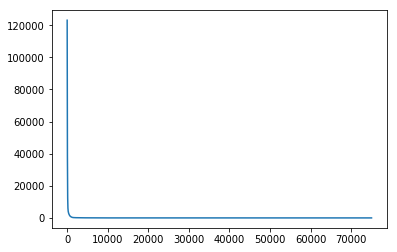

In [14]:
plt.plot(range(epochs), costVals)
plt.show()